### Just Some Data Cleansing



In [77]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np

In [78]:
# Reads the data into a dataframe
milk = pd.read_csv("Data/milk.csv")

In [79]:
# Fix errors in column names
milk.rename(columns = {"Temprature": "Temperature", "Fat ": "Fat", "Colour": "Color"}, inplace = True)

In [80]:
# Prints top 5 rows
milk.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [81]:
# Checks how many rows there are
len(milk)

1059

In [82]:
# Checks how many rows are high, medium, and low
len(milk[milk["Grade"] == "high"])

256

In [83]:
len(milk[milk["Grade"] == "medium"])

374

In [84]:
len(milk[milk["Grade"] == "low"])

429

In [85]:
# Drops null values if there are any
milk.dropna(inplace = True)
milk.reset_index(drop = True, inplace = True)

In [86]:
# Looks at info of dataframe
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Color        1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [87]:
# Sets target and input
target = milk["Grade"]
input_columns = milk.drop(columns = ["Grade"])

In [88]:
# Data Split
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [89]:
#Training data percentage
x_train.shape[0] / milk.shape[0]

0.7998111425873465

In [90]:
# We are going to do K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN 

In [91]:
# Creating the KNN model object 
milk_KNN = KNN(n_neighbors = 7)

In [92]:
# Fit data
milk_KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
# Predict data
y_hat = milk_KNN.predict(x_test)
y_hat

array(['low', 'low', 'medium', 'medium', 'low', 'medium', 'medium', 'low',
       'medium', 'low', 'high', 'low', 'medium', 'medium', 'medium',
       'medium', 'low', 'high', 'low', 'high', 'high', 'high', 'medium',
       'low', 'medium', 'low', 'high', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'medium', 'low', 'low', 'high', 'low', 'medium', 'low', 'high',
       'low', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low',
       'high', 'low', 'high', 'medium', 'medium', 'low', 'low', 'medium',
       'medium', 'medium', 'low', 'medium', 'low', 'medium', 'high',
       'low', 'medium', 'high', 'high', 'high', 'high', 'high', 'low',
       'medium', 'low', 'medium', 'high', 'low', 'high', 'medium', 'low',
       'medium', 'medium', 'high', 'low', 'low', 'medium', 'low', 'high',
       'high', 'low', 'high', 'low', 'medium', 'medium', 'low', 'low',
       'medium', 'high', 'high', 'high', 'medium', 'high', 'medium',
 

In [94]:
# Accuracy / KNN
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.9905660377358491

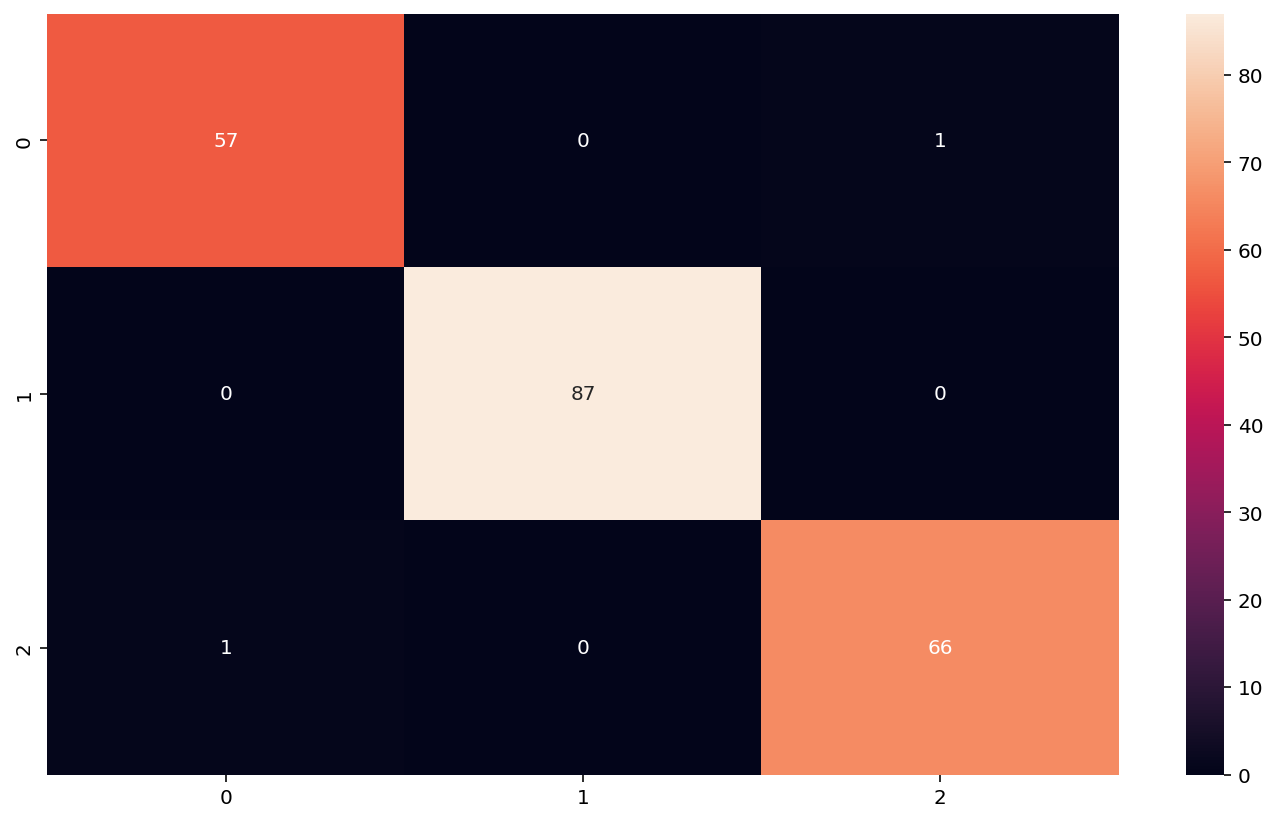

In [95]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [96]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
milk_RFC = RandomForestClassifier()
milk_RFC.fit(x_train, y_train)
y_hat = milk_RFC.predict(x_test)

In [97]:
# Accuracy / Random Forest
comparisions = np.array(y_hat == y_test)
comparisions.mean()

1.0

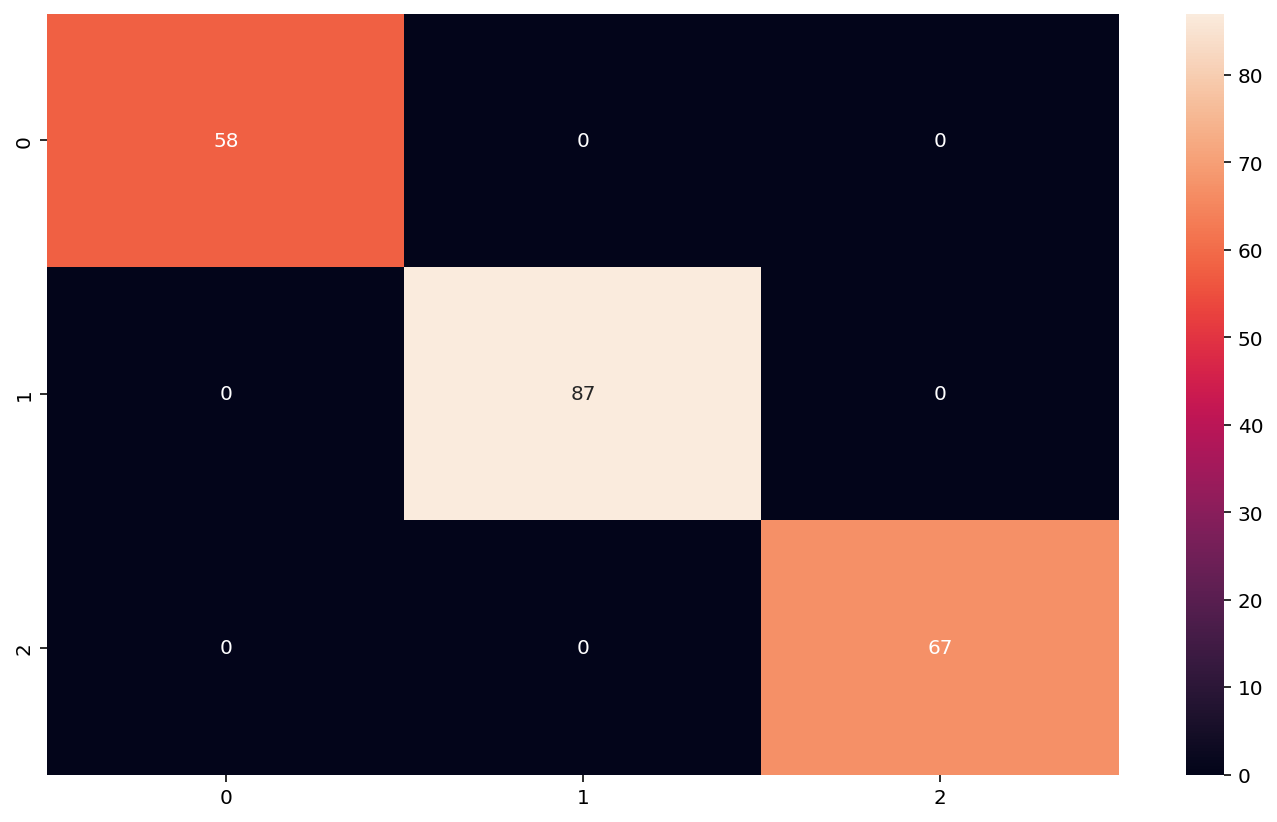

In [98]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [99]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
milk_mlp = MLPClassifier()
milk_mlp.fit(x_train, y_train)
y_hat = milk_mlp.predict(x_test)

In [100]:
# Accuracy / MLP
comparisions = np.array(y_hat == y_test)
comparisions.mean()

0.7452830188679245

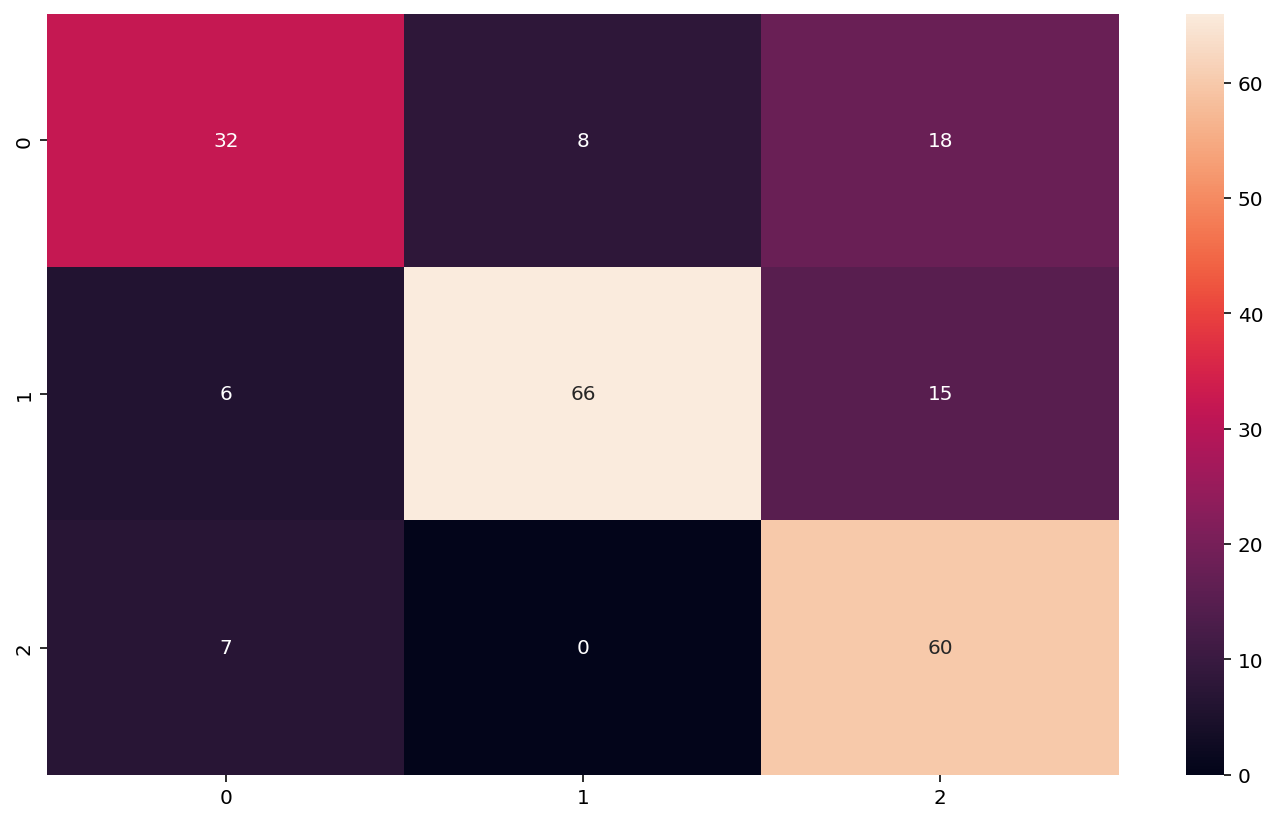

In [101]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [156]:
# Support Vector Machine Classification
from sklearn.svm import SVC
from sklearn import svm
milk_SVM = svm.SVC(C= 1.3, degree= 1, kernel= 'linear')
milk_SVM.fit(x_train, y_train)
y_hat = milk_SVM.predict(x_test)

In [149]:
from sklearn.model_selection import GridSearchCV
#parameters = {
    "C": [0.5, 0.7, 0.9, 1.1, 1.3],
    "degree": [1, 2, 4, 10, 12],
    "kernel": ["linear", "sigmoid", "poly"]
}

#optimizer = GridSearchCV(SVC(), param_grid = parameters, verbose = 2)
#optimizer.fit(x_train, y_train)

In [154]:
optimizer.best_params_

{'C': 1.3, 'degree': 1, 'kernel': 'linear'}

In [157]:
# Accuracy / SVM
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.8632075471698113

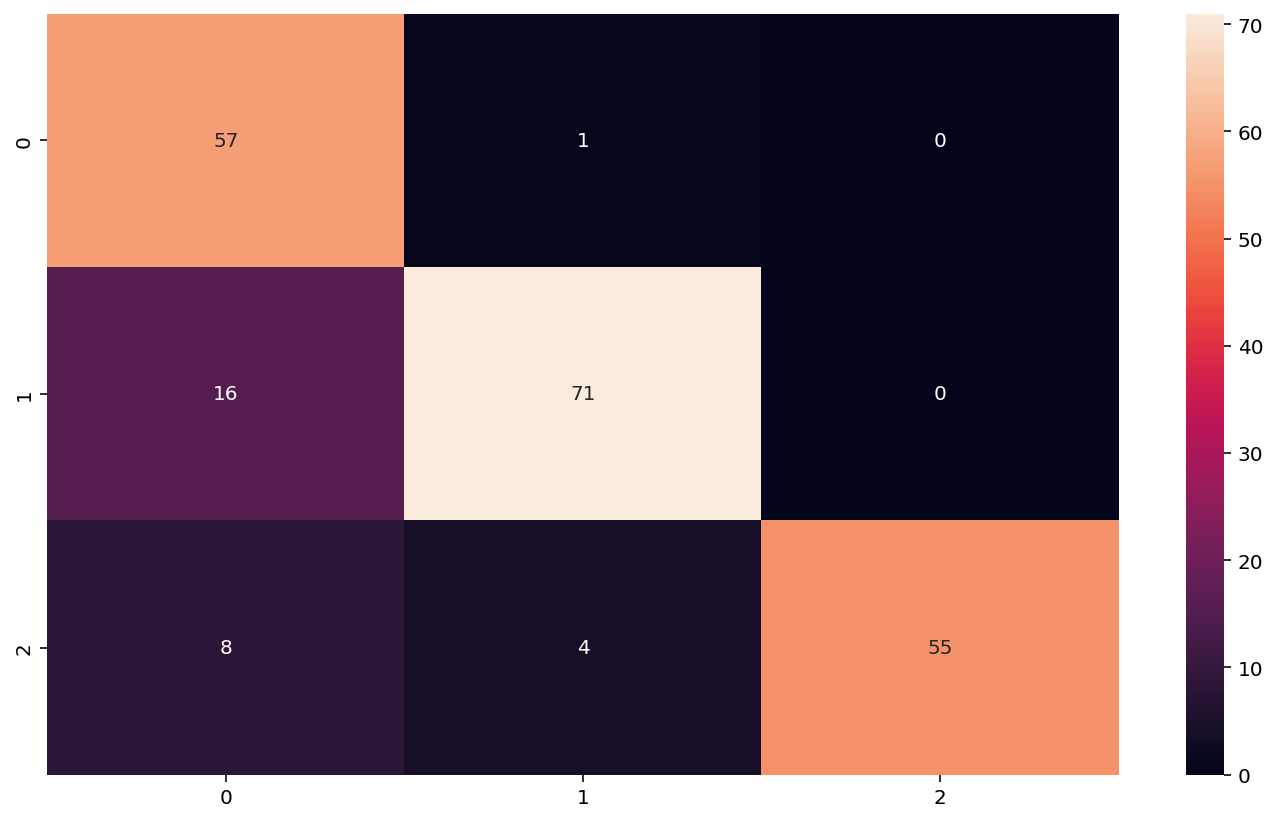

In [158]:
# Confusion Matrix / SVM
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [131]:
from sklearn.neural_network import MLPClassifier
milk_mlp = MLPClassifier()
milk_mlp.fit(x_train, y_train)
y_hat = milk_mlp.predict(x_test)

In [0]:
# Accuracy / MLP
comparisons = np.array(y_hat == y_test)
comparisons.mean()

In [0]:
# Confusion Matrix / MLP
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [127]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
milk_SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
milk_SGD.fit(x_train, y_train)
y_hat = milk_SGD.predict(x_test)

In [128]:
# Accuracy / SGD
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.5330188679245284

In [135]:
# Accuracy Score / SGD
from sklearn.metrics import accuracy_score
y_pred = y_hat
y_true = y_test
accuracy_score(y_true, y_pred)


0.7877358490566038

In [143]:
#F1 Score / SGD
from sklearn.metrics import f1_score
y_pred = y_hat
y_true = y_test
#f1_score(y_true, y_pred, average='macro')
f1_score(y_true, y_pred, average='micro')
#f1_score(y_true, y_pred, average='weighted')


0.7877358490566037

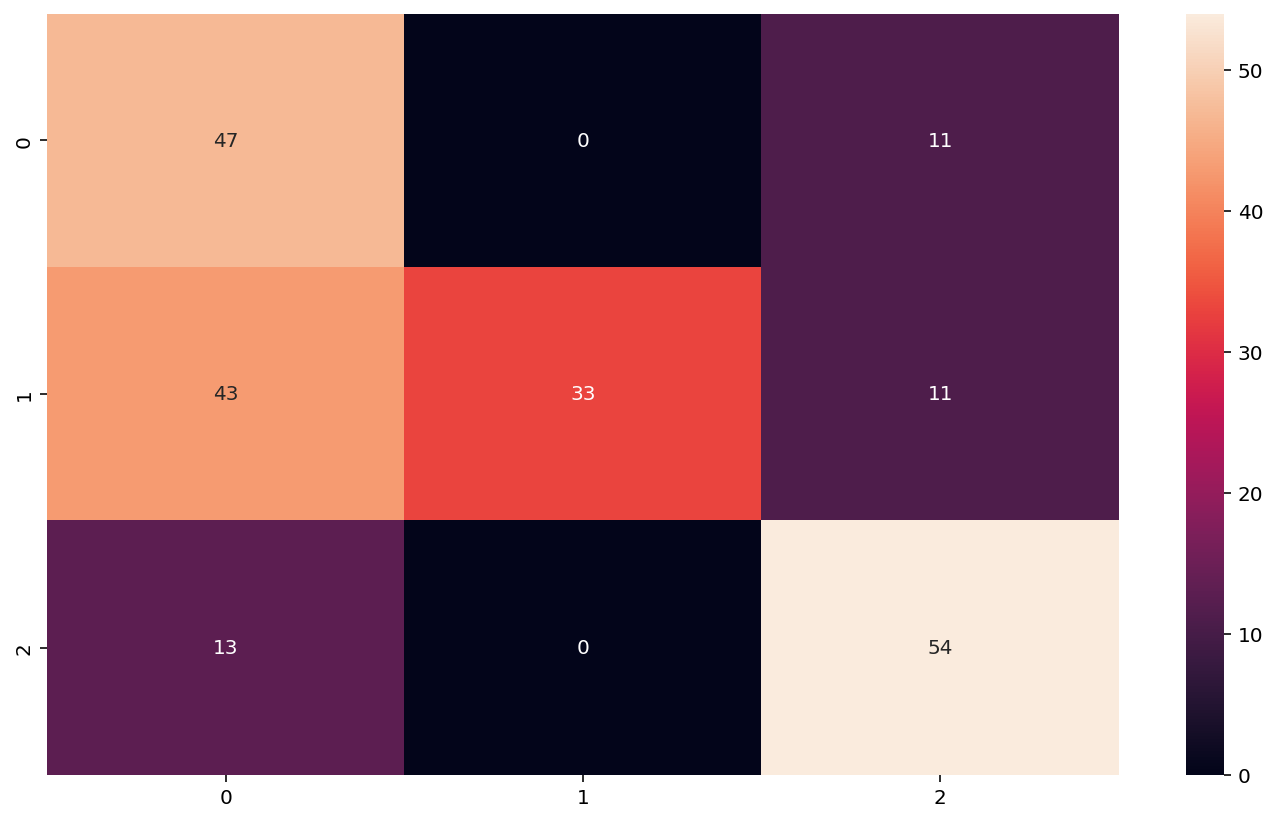

In [116]:
# Confusion Matrix / SGD
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [111]:
# Decision Tree Classification
from sklearn import tree
milk_tree = tree.DecisionTreeClassifier()
milk_tree.fit(x_train, y_train)
y_hat = milk_tree.predict(x_test)

In [112]:
# Accuracy / Decision Tree
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.9952830188679245

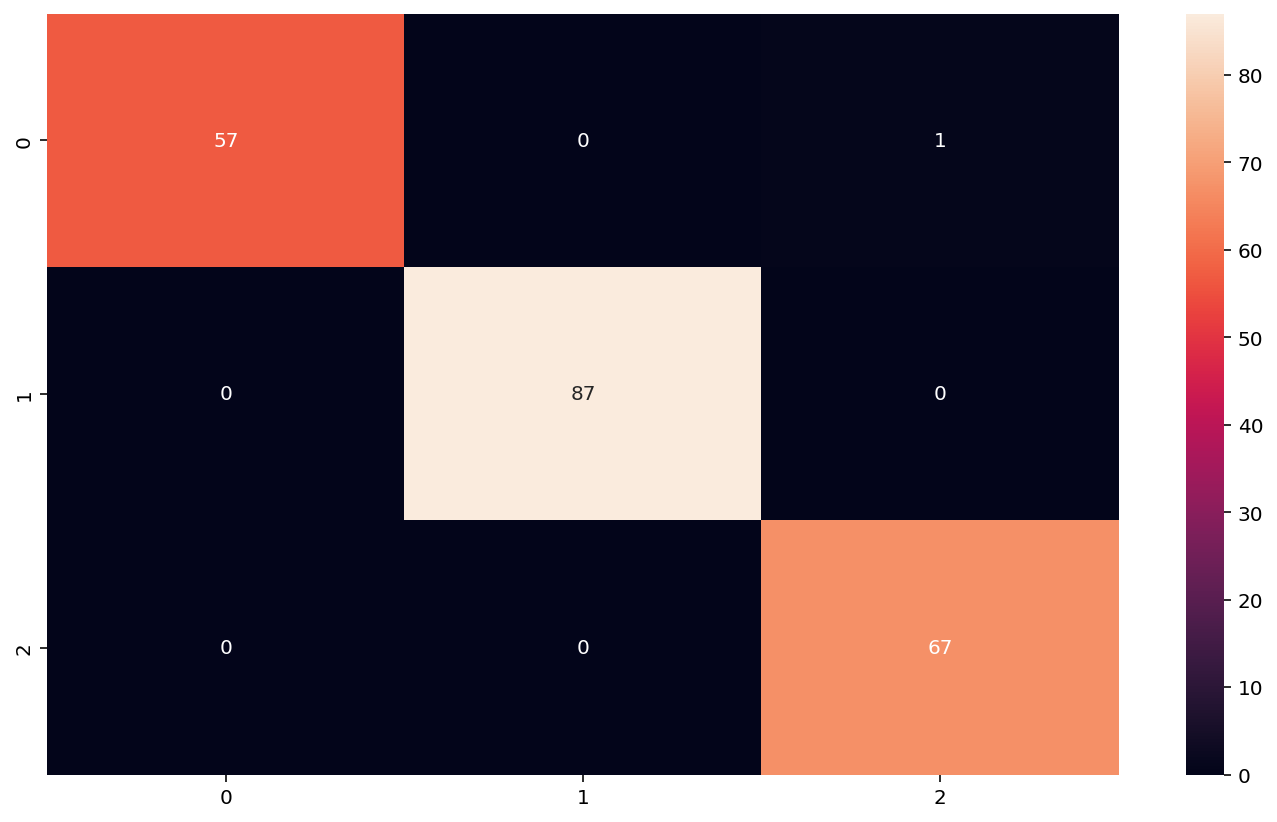

In [113]:
# Confusion Matrix / Decision Tree
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [144]:
# Gaussian Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
milk_GNB = GaussianNB()
milk_GNB.fit(x_train, y_train)
y_hat = milk_GNB.predict(x_test)

In [145]:
# Accuracy / GNB
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.9339622641509434

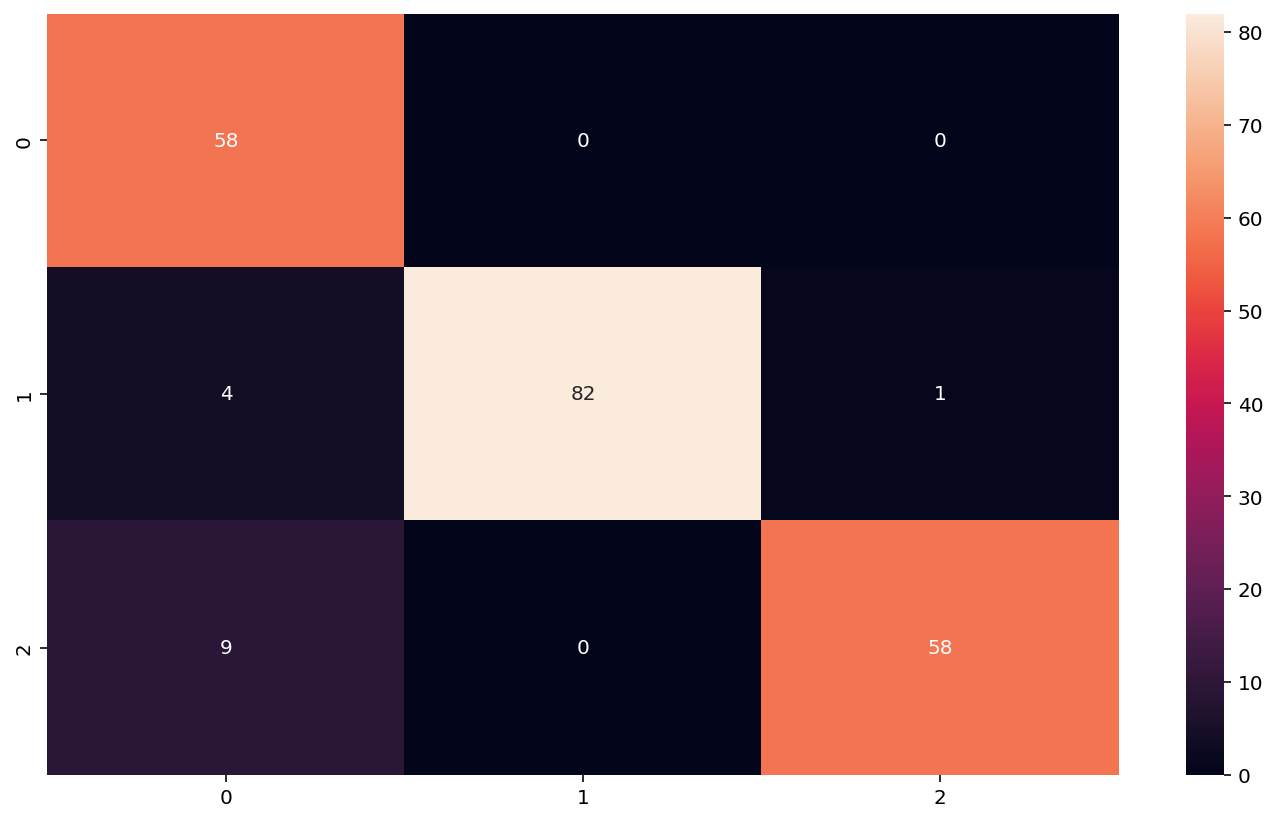

In [146]:
# Confusion Matrix / GNB
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [0]:
#Gaussian Process Kernel
from sklearn.gaussian_process.kernels import ConstantKernel
milk_CK = ConstantKernel()
milk_CK.fit(x_train, y_train)
y_hat = milk_CK.predict(x_test)

In [147]:
#Accuracy / GPK
comparisons = np.array(y_hat == y_test)
comparisons.mean()

0.9339622641509434

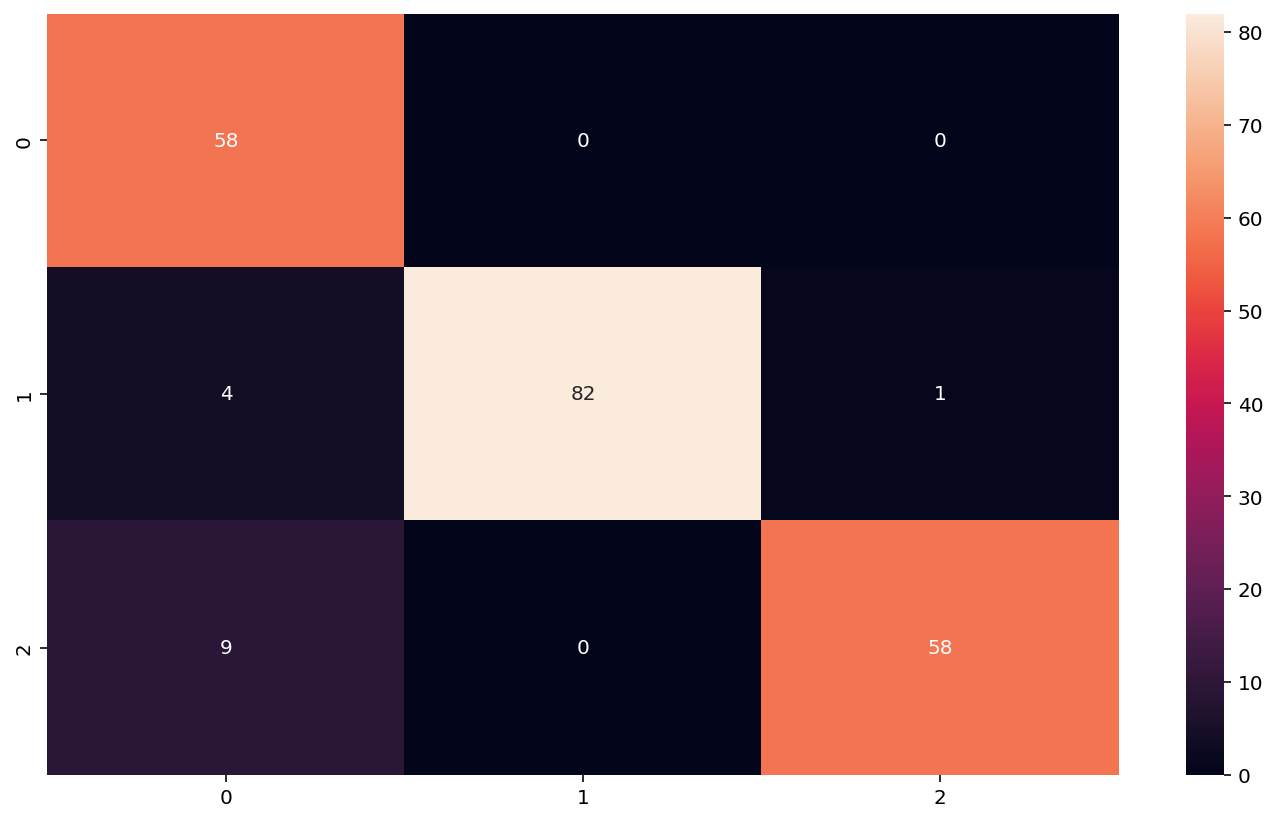

In [148]:
#Confusion Chart / GPK
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [0]:
#